<a href="https://colab.research.google.com/github/FaridRash/Time-Series-Analysis-and-Forecasting/blob/main/1st_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries and Git**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy.signal import periodogram
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
!git clone https://github.com/FaridRash/Time-Series-Analysis-and-Forecasting

Cloning into 'Time-Series-Analysis-and-Forecasting'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 4), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 5.92 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (4/4), done.


#**Data Reading**

In [3]:
file_path = '/content/Time-Series-Analysis-and-Forecasting/Data/EURUSD-2000-2020-15m.csv'
try:
    df = pd.read_csv(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,1.0080,1.0073,1.0073,1.0077
1,2000.01.03 00:15:00,1.0087,1.0076,1.0078,1.0086
2,2000.01.03 00:30:00,1.0089,1.0079,1.0087,1.0079
3,2000.01.03 00:45:00,1.0132,1.0078,1.0078,1.0128
4,2000.01.03 01:00:00,1.0133,1.0120,1.0129,1.0122


##Null Checking

In [4]:
display(df.isnull().sum())

,0
DATE_TIME,0
HIGH,0
LOW,0
OPEN,0
CLOSE,0


##Date and time converter

In [5]:
# Convert DATE_TIME to datetime if not already
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

In [6]:
# Sort just in case
df = df.sort_values('DATE_TIME')

#**Trend**

##Data Filtering

In [7]:
df_trend = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2020) & (df['DATE_TIME'].dt.month >= 4) & (df['DATE_TIME'].dt.month <= 7)].copy()
display(df_trend.head())
display(df_trend.tail())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
476710,2019-04-01 00:00:00,1.12292,1.12236,1.12283,1.12258
476711,2019-04-01 00:15:00,1.12282,1.12201,1.12252,1.12281
476712,2019-04-01 00:30:00,1.12300,1.12277,1.12281,1.12299
476713,2019-04-01 00:45:00,1.12302,1.12279,1.12299,1.12287
476714,2019-04-01 01:00:00,1.12285,1.12248,1.12285,1.12258


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
485153,2019-07-31 22:45:00,1.10750,1.10658,1.10698,1.10693
485154,2019-07-31 23:00:00,1.10707,1.10628,1.10694,1.10629
485155,2019-07-31 23:15:00,1.10679,1.10599,1.10629,1.10677
485156,2019-07-31 23:30:00,1.10765,1.10670,1.10677,1.10748
485157,2019-07-31 23:45:00,1.10770,1.10735,1.10747,1.10746


##SMA

In [8]:
# --- Simple Moving Averages (SMA) ---
df_trend['SMA_20'] = df_trend['CLOSE'].rolling(window=20).mean()
df_trend['SMA_100'] = df_trend['CLOSE'].rolling(window=100).mean()

##EMA

In [9]:
# --- Exponential Moving Averages (EMA) ---
df_trend['EMA_20'] = df_trend['CLOSE'].ewm(span=20, adjust=False).mean()
df_trend['EMA_100'] = df_trend['CLOSE'].ewm(span=100, adjust=False).mean()

##Visualization

In [10]:
print(df_trend[['DATE_TIME','CLOSE','SMA_20','EMA_20']].head(25))

                 DATE_TIME    CLOSE    SMA_20    EMA_20
476710 2019-04-01 00:00:00  1.12258       NaN  1.122580
476711 2019-04-01 00:15:00  1.12281       NaN  1.122602
476712 2019-04-01 00:30:00  1.12299       NaN  1.122639
476713 2019-04-01 00:45:00  1.12287       NaN  1.122661
476714 2019-04-01 01:00:00  1.12258       NaN  1.122653
476715 2019-04-01 01:15:00  1.12239       NaN  1.122628
476716 2019-04-01 01:30:00  1.12226       NaN  1.122593
476717 2019-04-01 01:45:00  1.12217       NaN  1.122553
476718 2019-04-01 02:00:00  1.12224       NaN  1.122523
476719 2019-04-01 02:15:00  1.12224       NaN  1.122496
476720 2019-04-01 02:30:00  1.12245       NaN  1.122492
476721 2019-04-01 02:45:00  1.12230       NaN  1.122473
476722 2019-04-01 03:00:00  1.12236       NaN  1.122463
476723 2019-04-01 03:15:00  1.12248       NaN  1.122464
476724 2019-04-01 03:30:00  1.12233       NaN  1.122451
476725 2019-04-01 03:45:00  1.12279       NaN  1.122484
476726 2019-04-01 04:00:00  1.12261       NaN  1

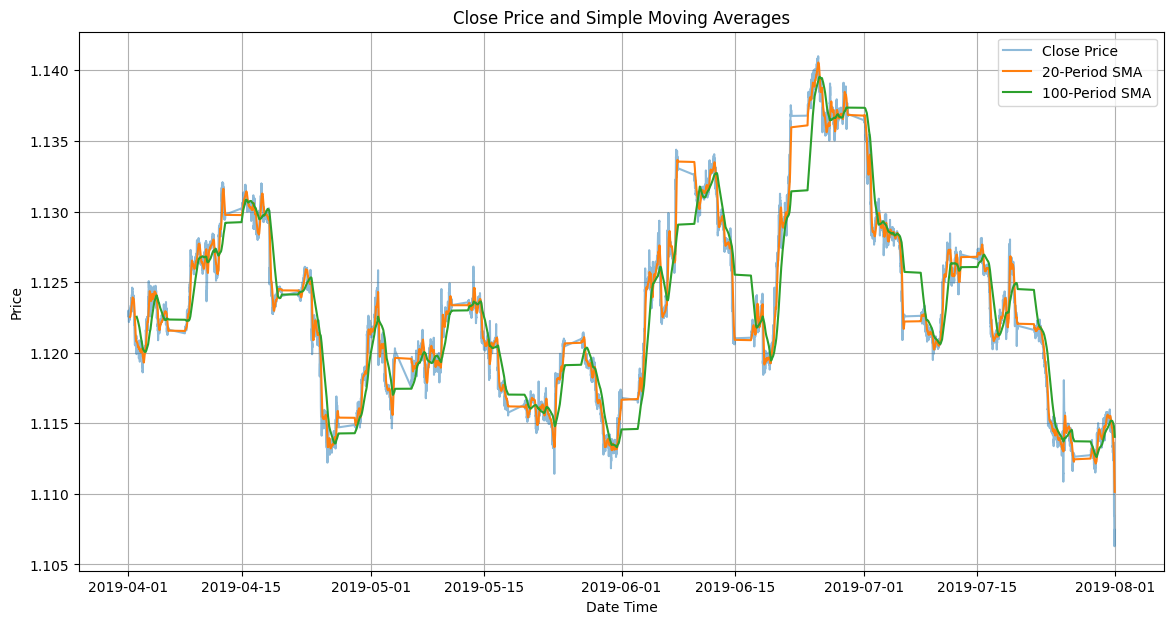

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_trend['DATE_TIME'], df_trend['CLOSE'], label='Close Price', alpha=0.5)
plt.plot(df_trend['DATE_TIME'], df_trend['SMA_20'], label='20-Period SMA')
plt.plot(df_trend['DATE_TIME'], df_trend['SMA_100'], label='100-Period SMA')
plt.title('Close Price and Simple Moving Averages')
plt.xlabel('Date Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

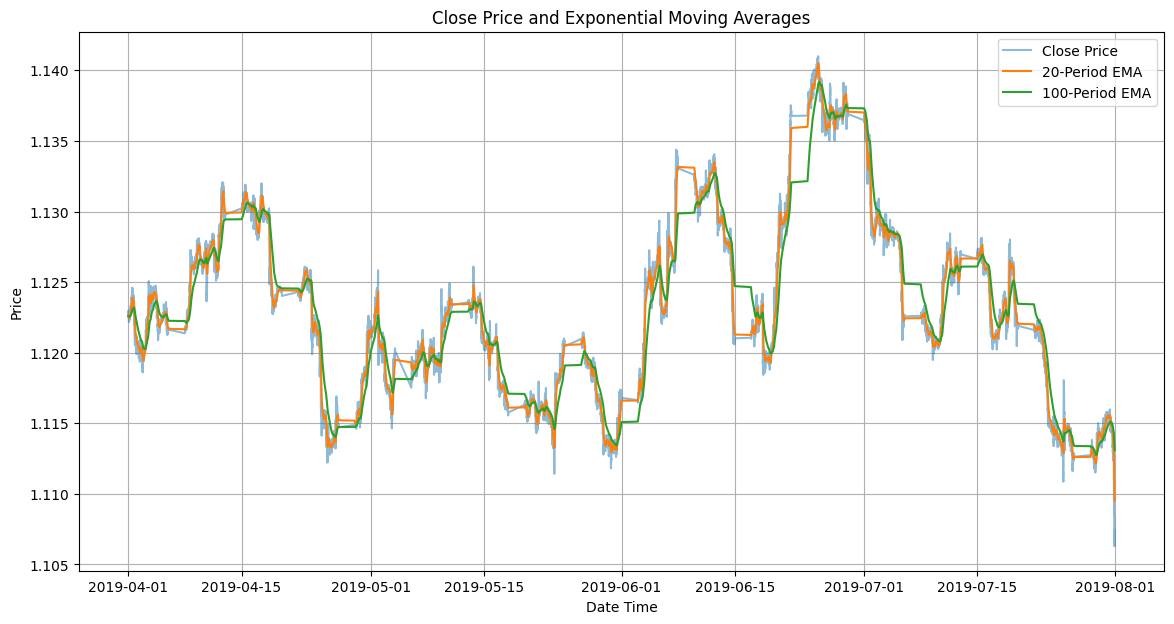

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df_trend['DATE_TIME'], df_trend['CLOSE'], label='Close Price', alpha=0.5)
plt.plot(df_trend['DATE_TIME'], df_trend['EMA_20'], label='20-Period EMA')
plt.plot(df_trend['DATE_TIME'], df_trend['EMA_100'], label='100-Period EMA')
plt.title('Close Price and Exponential Moving Averages')
plt.xlabel('Date Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df_seasonality = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2020) & (df['DATE_TIME'].dt.month >= 6) & (df['DATE_TIME'].dt.month <= 6) & (df['DATE_TIME'].dt.day >= 1) & (df['DATE_TIME'].dt.day <= 10)].copy()

#**Seasonality**

##Data Filtering

In [14]:
df_seasonality = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2020) & (df['DATE_TIME'].dt.month >= 5) & (df['DATE_TIME'].dt.month <= 5) & (df['DATE_TIME'].dt.day >= 1) & (df['DATE_TIME'].dt.day <= 10)].copy()


##Additive

<Figure size 1200x800 with 0 Axes>

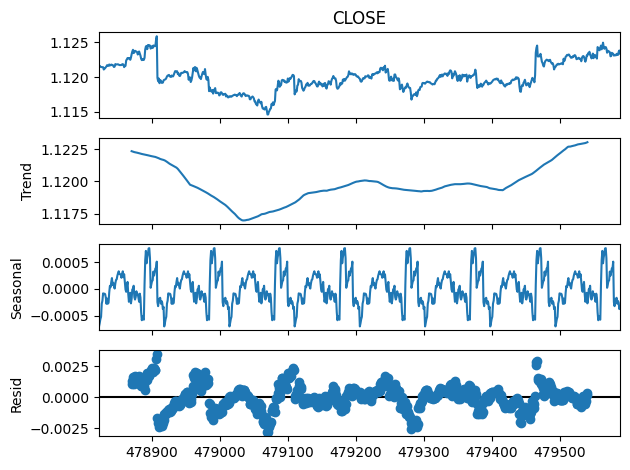

In [15]:
#Use CLOSE price for analysis ---
series = df_seasonality['CLOSE']

#Decompose with additive seasonality ---
# freq here = number of observations per cycle
# for 15-min data, daily cycle = 24*60/15 = 96
result = seasonal_decompose(series, model='additive', period=96)

#Plot the decomposition ---
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

##Multiplicative

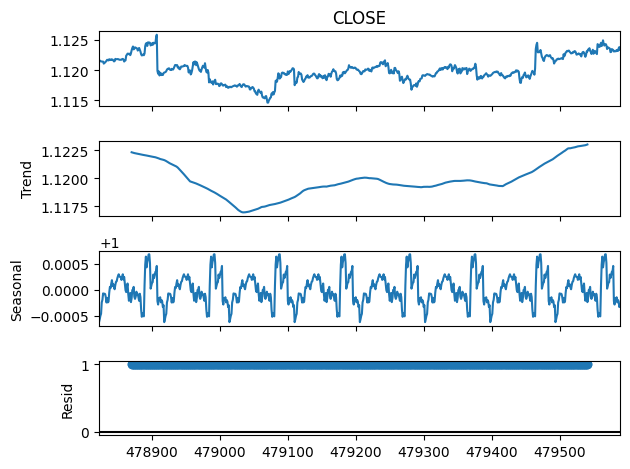

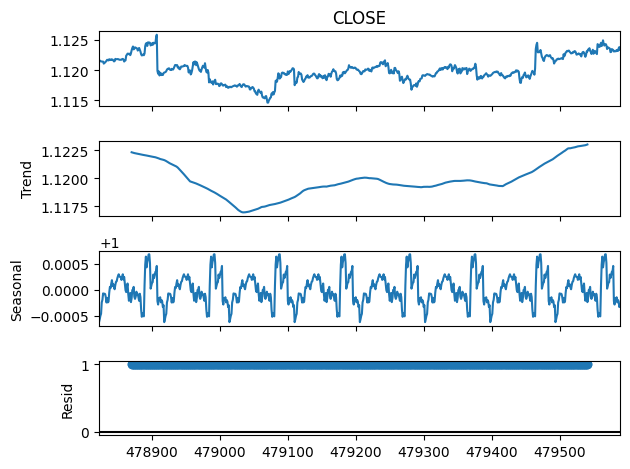

In [16]:
# Assume 'df_seasonality' has a DateTime index and a 'value' column
result = seasonal_decompose(df_seasonality['CLOSE'], model='multiplicative', period=96)  # e.g., 96 for 15-min data ~ 1 day

result.plot()


##Fixed

###Yearly

In [17]:
df_fixed = df.copy()
df_fixed = df_fixed.set_index('DATE_TIME')
df_daily = df_fixed['CLOSE'].resample('D').mean()

# Option 1: drop missing values
df_daily = df_daily.dropna()

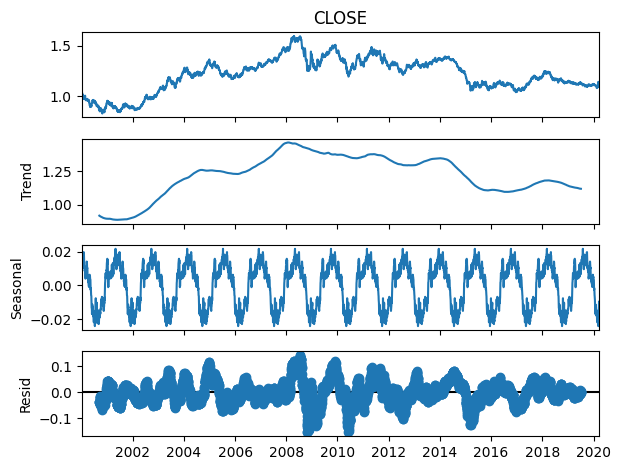

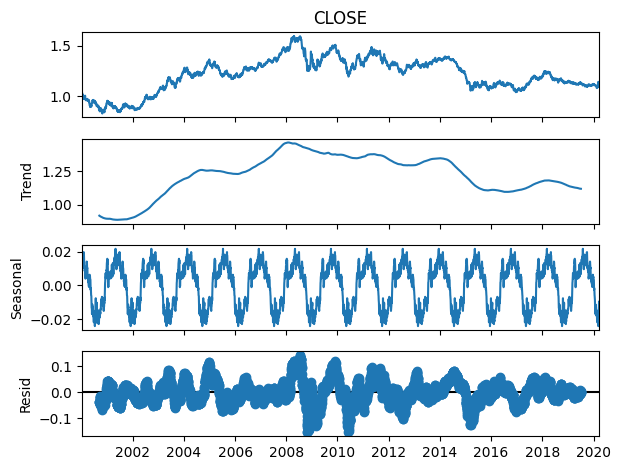

In [18]:
result = seasonal_decompose(df_daily, model='additive', period=365)  # yearly seasonality

result.plot()

###Daily

In [19]:
df_fixed_daily = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2019) & (df['DATE_TIME'].dt.month >= 5) & (df['DATE_TIME'].dt.month <= 5)].copy()

df_fixed_daily['DATE_TIME'] = pd.to_datetime(df_fixed_daily['DATE_TIME'])
df_fixed_daily = df_fixed_daily.set_index('DATE_TIME')

y = df_fixed_daily['CLOSE']


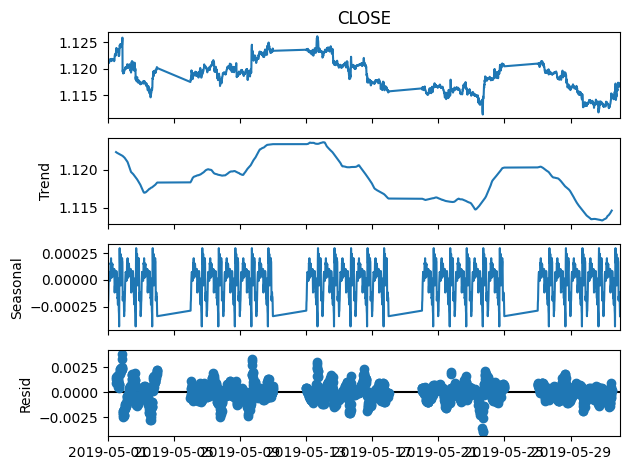

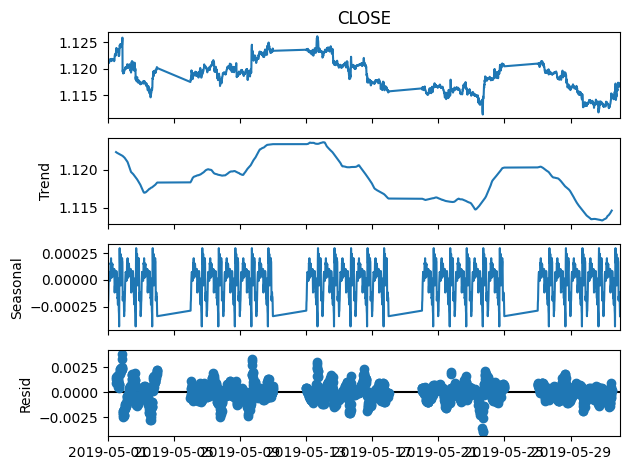

In [20]:
result_daily = seasonal_decompose(y, model='additive', period=96)
result_daily.plot()


In [21]:
"""
Seasonal (third panel)

This is the daily repeating cycle (period=96).

Notice the regular wave pattern that looks the same each day → this is fixed daily seasonality.

In forex, that corresponds to intraday trading patterns:

London open → more volatility

New York open → another activity spike

Asian hours → quieter
-------------------------------------------------------------------------------------------
Residual (bottom panel)

What’s left after removing trend + seasonality.

Looks like random noise with some volatility bursts (normal in FX, especially around news events).

No strong repeating structure left, which means the daily cycle was extracted well.
-------------------------------------------------------------------------------------------
Interpretation:

Your decomposition confirms fixed daily seasonality in EURUSD.

The amplitude is very stable across the month (the daily wave repeats almost identically).

That matches the reality of forex markets: liquidity/volatility is structured by market hours, so daily seasonality is predictable and fixed.

"""

'\nSeasonal (third panel)\n\nThis is the daily repeating cycle (period=96).\n\nNotice the regular wave pattern that looks the same each day → this is fixed daily seasonality.\n\nIn forex, that corresponds to intraday trading patterns:\n\nLondon open → more volatility\n\nNew York open → another activity spike\n\nAsian hours → quieter\n-------------------------------------------------------------------------------------------\nResidual (bottom panel)\n\nWhat’s left after removing trend + seasonality.\n\nLooks like random noise with some volatility bursts (normal in FX, especially around news events).\n\nNo strong repeating structure left, which means the daily cycle was extracted well.\n-------------------------------------------------------------------------------------------\nInterpretation:\n\nYour decomposition confirms fixed daily seasonality in EURUSD.\n\nThe amplitude is very stable across the month (the daily wave repeats almost identically).\n\nThat matches the reality of forex 

###Weekly

In [22]:
df_fixed_Weekly = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2019) & (df['DATE_TIME'].dt.month >= 1) & (df['DATE_TIME'].dt.month <= 6)].copy()

df_fixed_Weekly['DATE_TIME'] = pd.to_datetime(df_fixed_Weekly['DATE_TIME'])
df_fixed_Weekly = df_fixed_Weekly.set_index('DATE_TIME')

y = df_fixed_Weekly['CLOSE']

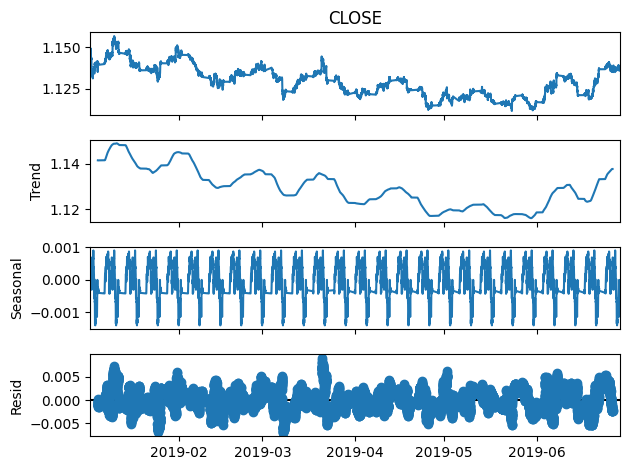

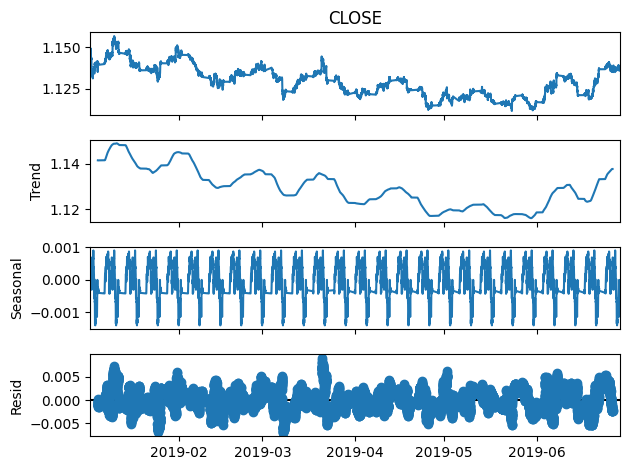

In [23]:
result_weekly = seasonal_decompose(y, model='additive', period=480)
result_weekly.plot()


###Monthly

In [24]:
df_fixed_monthly = df[(df['DATE_TIME'].dt.year >= 2018) & (df['DATE_TIME'].dt.year <= 2019)].copy()

df_fixed_monthly['DATE_TIME'] = pd.to_datetime(df_fixed_monthly['DATE_TIME'])
df_fixed_monthly = df_fixed_monthly.set_index('DATE_TIME')

y = df_fixed_monthly['CLOSE']

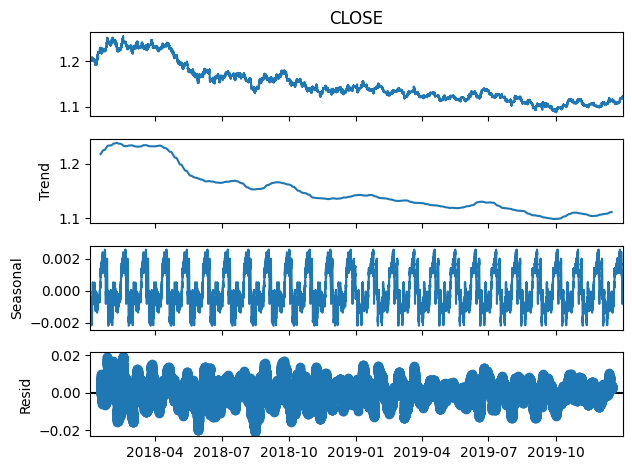

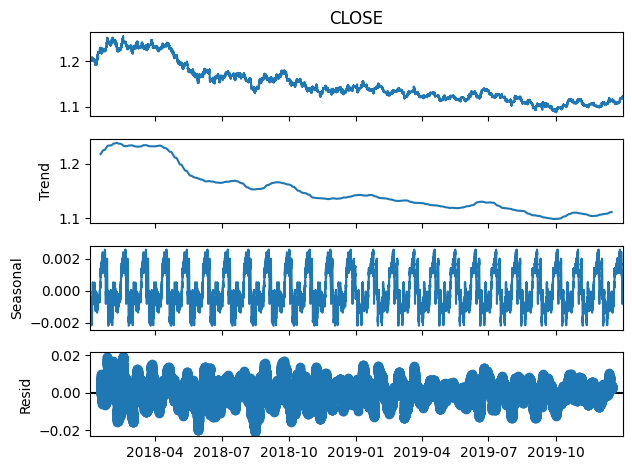

In [25]:
result_monthly = seasonal_decompose(y, model='additive', period=1920)
result_monthly.plot()


##Changing

In [28]:
df_fixed_changing = df[(df['DATE_TIME'].dt.year >= 2019) & (df['DATE_TIME'].dt.year <= 2019) & (df['DATE_TIME'].dt.month >= 1) & (df['DATE_TIME'].dt.month <= 6)].copy()


In [29]:
df_indexed = df_fixed_changing.set_index('DATE_TIME')
y = df_indexed['CLOSE'].astype(float)

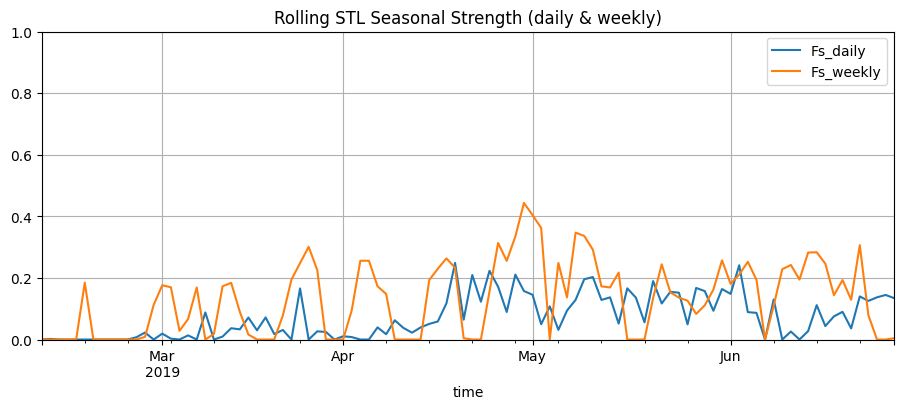

In [30]:
# --- parameters
WINDOW_DAYS = 28         # rolling window length to recompute STL
points_per_day = 96
points_per_week = 96*5   # or 96*7 for calendar week

# Build a rolling window index list (endpoints at day resolution)
end_times = y.resample('D').last().dropna().index

def stl_strength(series, period):
    # robust STL
    stl = STL(series, period=period, robust=True)
    res = stl.fit()
    rem = res.resid
    seas = res.seasonal
    num = np.var(rem, ddof=1)
    den = np.var(rem + seas, ddof=1)
    Fs = max(0.0, 1.0 - (num/den if den > 0 else 0.0))
    return Fs

daily_strength = []
weekly_strength = []
strength_time = []

for t_end in end_times[WINDOW_DAYS:]:
    t_start = t_end - pd.Timedelta(days=WINDOW_DAYS)
    seg = y.loc[t_start:t_end].dropna()
    # Need enough points for STL (>= 2 periods is a good rule of thumb)
    if len(seg) < 5*points_per_day:
        continue
    strength_time.append(t_end)
    daily_strength.append(stl_strength(seg, points_per_day))
    # weekly can be NaN if window is too short; guard:
    if len(seg) >= 2*points_per_week:
        weekly_strength.append(stl_strength(seg, points_per_week))
    else:
        weekly_strength.append(np.nan)

strength_df = pd.DataFrame({
    'time': strength_time,
    'Fs_daily': daily_strength,
    'Fs_weekly': weekly_strength
}).set_index('time')

ax = strength_df[['Fs_daily','Fs_weekly']].plot(figsize=(11,4))
ax.set_title('Rolling STL Seasonal Strength (daily & weekly)')
ax.set_ylim(0,1)
ax.grid(True)
plt.show()
